## Question 1:
__Use the User dataset perform Random Forest and compare with Decision Tree.__

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [2]:
from sklearn import datasets
data = pd.read_csv('User_Data.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [34]:
data['Gen']=data['Gender'].astype('category')
data['Gen'] = data['Gen'].cat.codes
x = data[['Gen','Age','EstimatedSalary']]   #feature
y = data[['Purchased']]   #target

In [35]:
print(x)

     Gen  Age  EstimatedSalary
0      1   19            19000
1      1   35            20000
2      0   26            43000
3      0   27            57000
4      1   19            76000
..   ...  ...              ...
395    0   46            41000
396    1   51            23000
397    0   50            20000
398    1   36            33000
399    0   49            36000

[400 rows x 3 columns]


In [36]:
print(y)
data.dtypes

     Purchased
0            0
1            0
2            0
3            0
4            0
..         ...
395          1
396          1
397          1
398          0
399          1

[400 rows x 1 columns]


User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
Gen                  int8
dtype: object

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=109)

clf = DecisionTreeClassifier(max_depth = 2,random_state = 0)   #model-selection
clf.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=2, random_state=0)

In [38]:
y_pred=clf.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[70, 10],
       [ 3, 37]], dtype=int64)

[Text(167.4, 181.2, 'X[1] <= 42.5\ngini = 0.465\nsamples = 280\nvalue = [177, 103]'),
 Text(83.7, 108.72, 'X[2] <= 90500.0\ngini = 0.271\nsamples = 198\nvalue = [166, 32]'),
 Text(41.85, 36.23999999999998, 'gini = 0.069\nsamples = 168\nvalue = [162, 6]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.231\nsamples = 30\nvalue = [4, 26]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 46.5\ngini = 0.232\nsamples = 82\nvalue = [11, 71]'),
 Text(209.25, 36.23999999999998, 'gini = 0.415\nsamples = 17\nvalue = [5, 12]'),
 Text(292.95, 36.23999999999998, 'gini = 0.168\nsamples = 65\nvalue = [6, 59]')]

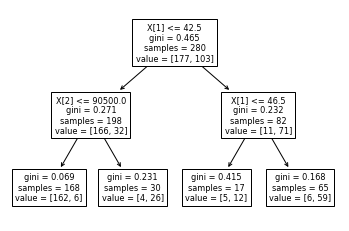

In [41]:
tree.plot_tree(clf)

In [42]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        80
           1       0.79      0.93      0.85        40

    accuracy                           0.89       120
   macro avg       0.87      0.90      0.88       120
weighted avg       0.90      0.89      0.89       120



In [43]:
'''
Random Forest Tree Classifocation

'''

'\nRandom Forest Tree Classifocation\n'

In [45]:
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(x_train, y_train)

<ipython-input-45-b267177774dc>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


RandomForestClassifier(n_estimators=50)

In [47]:
y_pred = classifier.predict(x_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[68 12]
 [ 7 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        80
           1       0.73      0.82      0.78        40

    accuracy                           0.84       120
   macro avg       0.82      0.84      0.83       120
weighted avg       0.85      0.84      0.84       120

Accuracy: 0.8416666666666667


__Conclusion: As accuracy of Random Forest is better than Decision Tree, Random Forest Algorithm is better for the given dataset__